## Case: Hand-written digit recognition

In [1]:
pip install keras==2.6.0

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow==2.9.1

     |████████████████████████████████| 228.5 MB 95 kB/s  eta 0:00:01    |█████████████▋                  | 96.8 MB 613 kB/s eta 0:03:35     |██████████████████████▏         | 158.3 MB 2.0 MB/s eta 0:00:35
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
     |████████████████████████████████| 57 kB 3.4 MB/s eta 0:00:011
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 9.6 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.0 MB/s eta 0:00:011
     |████████████████████████████████| 65 kB 5.5 MB/s eta 0:00:011
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 980 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 5.0 MB/s eta 0:00:01
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached tensorfl

In [7]:
# Load the libraries.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import datetime as dt  
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
#import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
#import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
#import pymc3 as pm
#import theano
from mpl_toolkits.mplot3d import Axes3D
#import fix_yahoo_finance as yf
warnings.simplefilter('ignore')
#sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist

%matplotlib inline

In [8]:
from keras.datasets import mnist

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests 
from sklearn.linear_model import LogisticRegression

Import the LeCun et al. MNIST dataset of handwritten characters

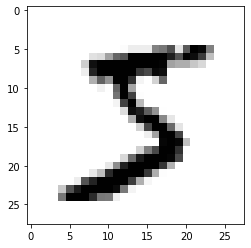

Training label(s): [5]


In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 1
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training label(s): %s' % (y_train[0:num_digits],))

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
y_train[0]

5

In [14]:
X_train[0,10:20,10:20]

array([[  1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,  35, 241, 225, 160, 108,   1,   0,   0],
       [  0,   0,   0,  81, 240, 253, 253, 119,  25,   0],
       [  0,   0,   0,   0,  45, 186, 253, 253, 150,  27],
       [  0,   0,   0,   0,   0,  16,  93, 252, 253, 187],
       [  0,   0,   0,   0,   0,   0,   0, 249, 253, 249],
       [  0,   0,   0,   0,  46, 130, 183, 253, 253, 207],
       [  0,   0,  39, 148, 229, 253, 253, 253, 250, 182]], dtype=uint8)

In [16]:
y_train[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

### These are grey scale images that can be converted to dataframes
* The darker the pixel, the larger the value in the cell.  
* The data is 28 X 28 pixel grids of 0-255 grey scale

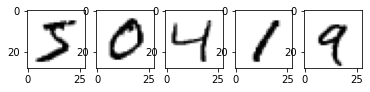

Training labels: [5 0 4 1 9]


In [18]:
num_digits = 5
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#    plt.axis('off')
plt.show()
print('Training labels: %s' % (y_train[0:num_digits],))

In [19]:
# Preprocess the NMIST data, which are stored as 28 X 28 pixels of grayscale between 1 and 255.

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], num_pixels).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], num_pixels).astype('float32')) / 255

In [20]:
# Keras needs the labels as categorical matrics.

y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)
num_classes = y_test_pp.shape[1]

In [21]:
y_test[0]

7

In [22]:
28**2

784

In [27]:
y_test_pp[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Logistic regression

In [23]:
#logistic regression
classifier = LogisticRegression()
classifier.fit(X_train_pp, y_train)

print(classifier.score(X_test_pp, y_test))

0.9256


### Random forest

In [26]:
#Random forest
rf = RandomForestClassifier(max_depth=10, oob_score=True, random_state=123456)
rf.fit(X_train_pp, y_train)

predicted = rf.predict(X_test_pp)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.947


### Neural network

In [29]:
# Define a simple MLP with three hidden layers of 150, 300, and 150 neurons, respectively.
# First line of code: set a seed for replication.
# Second: Define the model to be sequential using Keras.
# Next three lines: 
    # Define the MLP, where number units sets the number of neurons
    # input_dim is the dimension of the data flowing in and passing through the layers.  It remains fixed.
    # activation is the sigmoidal shape of a neuron, here using the rectified linear unit or 'relu'
# Final line: 
    # We map into the number of classes we have for the digits with the softmax activation, which just chooses
    # the most probable.
    #use soft-max activation: https://en.wikipedia.org/wiki/Softmax_function

np.random.seed(2019)
model = Sequential()
model.add(Dense(units=300, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Epoch 1/10


2023-10-25 18:09:30.270616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


300/300 - 1s - loss: 0.3142 - categorical_accuracy: 0.9067 - val_loss: 0.1279 - val_categorical_accuracy: 0.9617 - 1s/epoch - 5ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1098 - categorical_accuracy: 0.9660 - val_loss: 0.0976 - val_categorical_accuracy: 0.9695 - 945ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0725 - categorical_accuracy: 0.9777 - val_loss: 0.0804 - val_categorical_accuracy: 0.9748 - 1s/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0521 - categorical_accuracy: 0.9836 - val_loss: 0.0746 - val_categorical_accuracy: 0.9777 - 1s/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0392 - categorical_accuracy: 0.9874 - val_loss: 0.0749 - val_categorical_accuracy: 0.9768 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0334 - categorical_accuracy: 0.9894 - val_loss: 0.0919 - val_categorical_accuracy: 0.9745 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0264 - categorical_accuracy: 0.9915 - val_loss: 0.0753 - val_categorical_accuracy: 0.9793 - 1s/epo

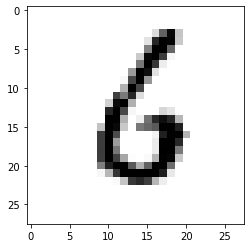

Classified as a 6 with probability 0.999986


In [30]:
# Examine the performance of the 50th image in the test set.

img = 50
plt.imshow(X_test[img], cmap=plt.get_cmap('gray_r'))
#plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [31]:
# Standard measures of performance.
# First the accuracy rate on the test or validation set.

from sklearn.metrics import accuracy_score
print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))

Accuracy Rate: 0.978200


In [32]:
# Next the confusion matrix, which shows correct and incorrect classification on the test set.

from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))

Confusion matrix:
[[ 973    1    0    0    0    2    0    0    3    1]
 [   0 1126    1    3    0    0    1    1    3    0]
 [   8    0  999    8    3    0    2    5    5    2]
 [   0    0    2  992    0    3    0    5    2    6]
 [   1    3    1    0  950    0    3    2    1   21]
 [   4    0    0   17    1  860    3    1    2    4]
 [   7    2    0    0    3    3  941    0    2    0]
 [   1    2    4    0    0    0    0 1011    2    8]
 [   7    1    2    7    1    3    1    2  940   10]
 [   4    2    0    1    3    4    0    5    0  990]]


In [33]:
# Next a classification report.

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
# Finally, identify cases that failed.

errors=(y_test - prob.argmax(axis = 1) > 0).nonzero()[0]; errors

array([ 104,  247,  259,  340,  445,  495,  582,  654,  691,  877,  882,
        951,  965, 1003, 1014, 1226, 1247, 1319, 1331, 1393, 1464, 1530,
       1678, 1709, 1717, 1901, 1984, 2004, 2073, 2093, 2098, 2135, 2189,
       2291, 2292, 2293, 2369, 2462, 2526, 2597, 2607, 2648, 2654, 2721,
       2810, 2896, 2921, 2939, 3030, 3422, 3503, 3520, 3550, 3558, 3662,
       3838, 3893, 3902, 4075, 4123, 4163, 4294, 4300, 4497, 4536, 4731,
       4761, 4807, 4823, 5068, 5495, 5569, 5749, 5887, 5937, 5972, 5982,
       6024, 6028, 6035, 6505, 6571, 6847, 7574, 7800, 7921, 8311, 8408,
       9009, 9015, 9024, 9316, 9587, 9692, 9745, 9768, 9770, 9777, 9779,
       9792, 9888, 9904])

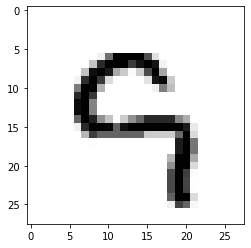

Classified as a 5 with probability 0.720488


In [35]:
img = errors[0]
plt.imshow(X_test[img], cmap=plt.get_cmap('gray_r'))
#plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [36]:
y_test[img]

9